In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2023-06-23 11:06:49--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2023-06-23 11:06:49 (30.0 MB/s) - ‘moore.csv’ saved [2302/2302]



In [ ]:
# another way to get data from web
# url = "https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv"
# tf.keras.utils.get_file('moore.csv', url)

In [3]:
!ls

moore.csv  sample_data


In [4]:
!head moore.csv

1971,2300
1972,3500
1973,2500
1973,2500
1974,4100
1974,4500
1974,8000
1975,3510
1976,5000
1976,8500


In [10]:
data = pd.read_csv("moore.csv", header=None, names=['year', 'number'])

In [11]:
data.head()

,year,number
0,1971,2300
1,1972,3500
2,1973,2500
3,1973,2500
4,1974,4100


In [12]:
data.shape

(162, 2)

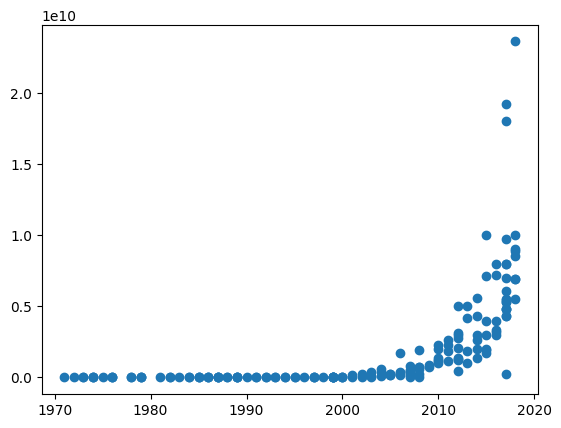

In [13]:
plt.scatter(data['year'], data['number'])

In [14]:
data['number'] = data['number'].apply(np.log)

In [ ]:
# data['year'] = data['year'].apply(np.log)

In [15]:
data.number

0       7.740664
1       8.160518
2       7.824046
3       7.824046
4       8.318742
         ...    
157    23.613638
158    23.678176
159    22.906617
160    23.884513
161    22.920490
Name: number, Length: 162, dtype: float64

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [24]:
X = data.year
y = data.number

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
S = StandardScaler()

In [27]:
X_train = S.fit_transform(X_train)
X_test = S.transform(X_test)

ValueError: ignored

In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(1),
    tf.keras.layers.Dense(1)
])

In [20]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')

In [21]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test) , epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 71ms/step - loss: 114255938111631301394516934656.0000 - val_loss: inf
Epoch 2/100
4/4 [==============================] - 0s 12ms/step - loss: inf - val_loss: inf
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: nan - val_loss: nan
Epoch 4/100
4/4 [==============================] - 0s 18ms/step - loss: nan - val_loss: nan
Epoch 5/100
4/4 [==============================] - 0s 12ms/step - loss: nan - val_loss: nan
Epoch 6/100
4/4 [==============================] - 0s 13ms/step - loss: nan - val_loss: nan
Epoch 7/100
4/4 [==============================] - 0s 15ms/step - loss: nan - val_loss: nan
Epoch 8/100
4/4 [==============================] - 0s 13ms/step - loss: nan - val_loss: nan
Epoch 9/100
4/4 [==============================] - 0s 21ms/step - loss: nan - val_loss: nan
Epoch 10/100
4/4 [==============================] - 0s 13ms/step - loss: nan - val_loss: nan
Epoch 11/100
4/4 [=============================

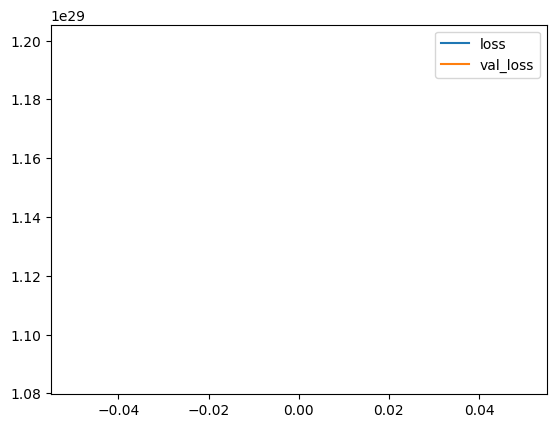

In [22]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [ ]:
model.evaluate()